In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Rastgele zaman serisi verisi oluşturma
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.rand(100) * 100




In [7]:
data = pd.DataFrame({'Date': dates, 'Close': values})
data.set_index('Date', inplace=True)

# Veriyi eğitim ve test setlerine ayırma
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

data.head()

Close
Date                 
2023-01-01  54.881350
2023-01-02  71.518937
2023-01-03  60.276338
2023-01-04  54.488318
2023-01-05  42.365480

In [9]:


# ARIMA modelini oluşturma ve eğitme
p, d, q = 1, 1, 1  # Parametreler
model = ARIMA(train_data['Close'], order=(p, d, q))
model_fit = model.fit()



c:\Users\DevToolsUser\anaconda3\envs\Emre\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DevToolsUser\anaconda3\envs\Emre\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DevToolsUser\anaconda3\envs\Emre\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
# Tahminlemeleri yapma
forecast_steps = len(test_data)
predictions = model_fit.forecast(steps=forecast_steps)[0]
predictions = np.array(predictions)

In [24]:
type(predictions)

numpy.ndarray

In [26]:
test_values = test_data['Close'].values
mse = np.mean((test_values - predictions)**2)  # Numpy ile ortalama karesel hata hesaplaması
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 749.9642818665021


ValueError: x and y must be the same size

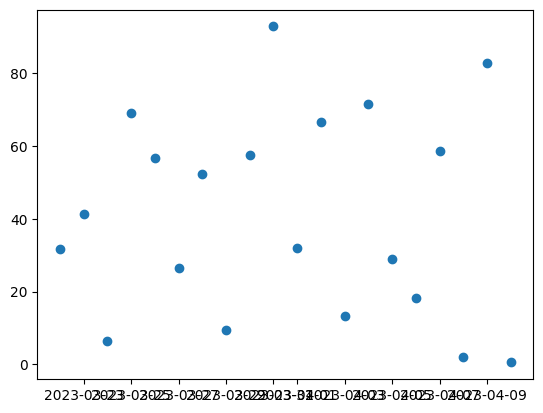

In [28]:
# Tahminlemeleri görselleştirme
plt.scatter(test_data.index, test_values, label='Gerçek Değerler')
plt.scatter(test_data.index, predictions, color='red', label='Tahminlemeler')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('ARIMA ile Rastgele Zaman Serisi Kapanış Fiyatı Tahminlemesi')
plt.legend()
plt.show()